# DATA IMPORTING

In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.utils import to_categorical

data = pd.read_pickle('./train/featurised.csv') # reading pickle file for training

tester = pd.read_pickle('./test/featurised.csv') # reading pickle file for testing

Using TensorFlow backend.


In [2]:
data=data.drop(columns=['start', 'stop']) # deleting unwanted columns
data.infer_objects() # determining datatypes present in dataframe
type(data.iloc[0,1])
data.head()

,label,music
0,babycry,"[[0.7639337425550246, 0.6550242365052964, 0.42..."
1,babycry,"[[-0.543597299526563, -0.9428291340167716, -1...."
2,none,"[[-0.1903899039644559, 0.1827240966906672, 0.2..."
3,none,"[[1.5529618435211259, 1.3576098636501042, 1.47..."
4,none,"[[1.3362740413911116, 1.4712855405769114, 1.28..."


In [3]:
tester=tester.drop(columns=['start', 'stop']) # deleting unwanted columns
tester.infer_objects() # determining datatypes present in dataframe
type(tester.iloc[0,1]) # verifying datatype

numpy.ndarray

In [4]:
X = np.array(data.iloc[:,1].tolist()) # features for training
Y = np.array(data.iloc[:,0].tolist()) # labels for training

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Y) 
Y_classes = le.transform(Y) # Encode labels with value between 0 and n_classes-1.
Y_classes
yy = to_categorical(Y_classes) # One-hot encoding of labels
X.shape

(1491, 40, 1292)

In [5]:
X_test = np.array(tester.iloc[:,1].tolist()) # features for testing
Y_test = np.array(tester.iloc[:,0].tolist()) # labels for testing

le = LabelEncoder()
le.fit(Y_test)
Y_classes_test = le.transform(Y_test) # Encode labels with value between 0 and n_classes-1.
Y_classes_test
yy_test = to_categorical(Y_classes_test) # One-hot encoding of labels
X_test.shape

(1496, 40, 1292)

# MODEL DESIGN

In [6]:
x_train=X
y_train=yy
x_test=X_test
y_test=yy_test

# importing modules for building Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn import metrics 

# defining features for reshaping 
num_rows = 40
num_columns = 1292
num_channels = 1

# reshaping the features for CNN
x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]

In [7]:
# Construct model 
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())

model.add(keras.layers.Reshape((-1,1)))
model.add(keras.layers.SimpleRNN(20,use_bias=True))

model.add(Dense(num_labels, activation='softmax'))

W0711 14:10:44.832281 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 14:10:44.844720 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 14:10:44.852897 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 14:10:44.870703 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 14:10:44.8774

In [8]:
adam=keras.optimizers.Adam(lr=0.005) # defining optimizer learning rate
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam) #compiling model
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

W0711 14:10:45.117265 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 14:10:45.156877 140685958248256 deprecation_wrapper.py:119] From /home/soumya/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 1291, 16)      80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 645, 16)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 645, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 644, 32)       2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 322, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 322, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 321, 64)        8256      
__________

In [9]:
from sklearn.utils import class_weight

weights={0:1.2,1:2.0,2:2.0,3:0.25}

weights

{0: 1.2, 1: 2.0, 2: 2.0, 3: 0.25}

# MODEL TRAINING

In [10]:
from datetime import datetime 

num_epochs = 120

start = datetime.now()

mod=model.fit(x_train, y_train, epochs=num_epochs, verbose=2,validation_split=0.1,class_weight=weights)


duration = datetime.now() - start
print("Training completed in time: ", duration)

W0711 14:10:50.462393 140685958248256 deprecation.py:323] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1341 samples, validate on 150 samples
Epoch 1/120
 - 6s - loss: 1.3022 - acc: 0.1805 - val_loss: 1.5759 - val_acc: 0.0000e+00
Epoch 2/120
 - 5s - loss: 1.2920 - acc: 0.1842 - val_loss: 1.9237 - val_acc: 0.0000e+00
Epoch 3/120
 - 5s - loss: 1.3016 - acc: 0.1849 - val_loss: 1.6056 - val_acc: 0.0000e+00
Epoch 4/120
 - 5s - loss: 1.3061 - acc: 0.1864 - val_loss: 1.5395 - val_acc: 0.0000e+00
Epoch 5/120
 - 5s - loss: 1.2917 - acc: 0.1864 - val_loss: 1.5882 - val_acc: 0.0000e+00
Epoch 6/120
 - 5s - loss: 1.2725 - acc: 0.1879 - val_loss: 1.8515 - val_acc: 0.0000e+00
Epoch 7/120
 - 5s - loss: 1.2718 - acc: 0.1946 - val_loss: 1.4540 - val_acc: 0.0000e+00
Epoch 8/120
 - 5s - loss: 1.2439 - acc: 0.2304 - val_loss: 1.5469 - val_acc: 0.0000e+00
Epoch 9/120
 - 5s - loss: 1.2495 - acc: 0.2342 - val_loss: 1.6891 - val_acc: 0.0000e+00
Epoch 10/120
 - 5s - loss: 1.2458 - acc: 0.2394 - val_loss: 1.4882 - val_acc: 0.0000e+00
Epoch 11/120
 - 5s - loss: 1.2359 - acc: 0.2312 - val_loss: 1.7746 - val

Epoch 96/120
 - 5s - loss: 0.5233 - acc: 0.6943 - val_loss: 0.6806 - val_acc: 0.6933
Epoch 97/120
 - 5s - loss: 0.5092 - acc: 0.6957 - val_loss: 0.5934 - val_acc: 0.6933
Epoch 98/120
 - 5s - loss: 0.5183 - acc: 0.7002 - val_loss: 0.7300 - val_acc: 0.6733
Epoch 99/120
 - 5s - loss: 0.5151 - acc: 0.6629 - val_loss: 0.6278 - val_acc: 0.7333
Epoch 100/120
 - 5s - loss: 0.5173 - acc: 0.6764 - val_loss: 0.7346 - val_acc: 0.6800
Epoch 101/120
 - 5s - loss: 0.4785 - acc: 0.6831 - val_loss: 0.6074 - val_acc: 0.6200
Epoch 102/120
 - 5s - loss: 0.4781 - acc: 0.6749 - val_loss: 0.6537 - val_acc: 0.6733
Epoch 103/120
 - 5s - loss: 0.4944 - acc: 0.6704 - val_loss: 0.4873 - val_acc: 0.7267
Epoch 104/120
 - 5s - loss: 0.4755 - acc: 0.7062 - val_loss: 0.7787 - val_acc: 0.7133
Epoch 105/120
 - 5s - loss: 0.4976 - acc: 0.6786 - val_loss: 0.5165 - val_acc: 0.7800
Epoch 106/120
 - 5s - loss: 0.4927 - acc: 0.6935 - val_loss: 0.5293 - val_acc: 0.6667
Epoch 107/120
 - 5s - loss: 0.5010 - acc: 0.6868 - val_los

In [11]:
# saving the model for building realtime prediction
model.save("model.h5")

# MODEL EVALUATION

In [12]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

from sklearn.metrics import f1_score
print("training f1 score: ",f1_score(Y_classes,np.argmax(model.predict(x_train),axis=1),average='weighted'))
print("testing f1 score: ",f1_score(Y_classes_test,np.argmax(model.predict(x_test),axis=1),average='weighted'))

Training Accuracy:  0.7900737758693401
Testing Accuracy:  0.7105614973262032
training f1 score:  0.7947596231952957
testing f1 score:  0.7204226963491089


In [13]:
y_p=model.predict(x_test).argmax(axis=1) # predicting the output

In [14]:
# confusion matrix for testing data
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(Y_classes_test,y_p))
cm

,0,1,2,3
0,205,14,7,21
1,2,215,19,14
2,1,84,128,37
3,14,94,126,515


## Graphs to check Overfitting

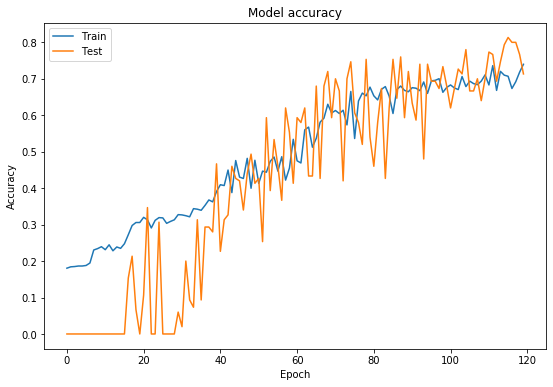

In [15]:
# Plot training & validation accuracy to check overfitting
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(mod.history['acc'])
plt.plot(mod.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

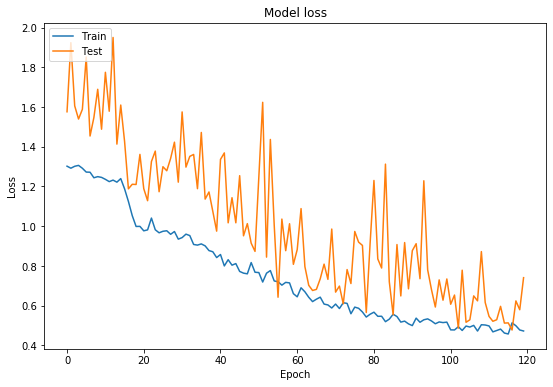

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(9,6))
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
